<a href="https://colab.research.google.com/github/MySureStart/MIT_FutureMakers_2023/blob/main/Module_05_Artificial_Neural_Networks/Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

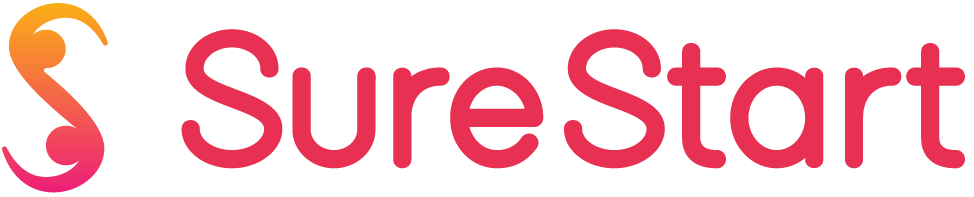

#Objectives
* To deepen your understanding of neural networks and deep learning with real-world examples.
* To further explore the different components and concepts of neural networks using a simple NN model.


# Introduction of Neural Networks

By now, you likely know how neural networks generally look. The purpose of today is to show you how they work; how easy abstractions such as TensorFlow make it for us to build these models; and how much compute and time efficiency they provide.

In today's exercises, we shall be implementing a large code blocks using Python libraries that are not Tensorflow. Consequently, the execution will be slower than if it is written entirely using TensorFlow, which while still part of Python has a large portion of it coded in C, giving it loads of flexibility and speed.

In [ ]:
# fetch_openml is a module in sklearn.datasets equivalent to tensorflow.keras.datasets
from sklearn.datasets import fetch_openml

# numpy is employed for the use of its matrix multiplication
# and other matrix manipulation utilities
import numpy as np

# in order to focus on the neural networks mechanics,
# we shall employ data handling functions from other libraries
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.model_selection import train_test_split

#to keep track of time
import time

import matplotlib.pyplot as plt


#Another version of the MNIST Dataset

***mnist_784*** is the version of the MNIST number dataset with 784 features. It has a dimensionality of 28x28 pixels and the 784 features represent a total of 784 pixels per image of 28x28 pixels, and each pixel is treated as an input feature.

In [ ]:
#fetching the data
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# normalizing the data between 0 and 1
# question: why did we divide by 255?
x = (x/255).astype('float32')

#x = map(float,x)

# creating the list of labels for the respective index of the dataset
# this is used to determing the loss and identify the image class
y = to_categorical(y)

# a function of sklearn which separates data into two parts: train and test
# for MNIST dataset a split of 60,000 Training data samples
# and 10,000 Test data samples are done
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

#Hyperparameters

By now, you have likely heard the terminology "hyperparameters".

Hyperparameters are attributes, whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.

The hyperparameters we can play with usually include:
* Number of layers
* Dimensions of the layers
* Learning Rate
* Training Epochs
among others.

You will see these used in the neural network that will build below: (To keep the model building process easy to understand, some of these hyperparameters will be hard-coded in, rather than written in a way that is perfectly generalized.)

The first layer of the neural network is always **the input layer**. In today's network to take in the 784 features for the MNIST_784 dataset, the input layer has 784 nodes.

The next set of layers in the middle of input and output layers are **the hidden layers**, and can have as many nodes as we choose to design for the purposes of predictive power and efficiency. Hidden layers are expected to learn the **latent variables/dimensions** --- variables/dimensions that are not directly observed but are rather inferred (through a mathematical model) from other variables/dimensions that are observed (directly measured).#elaborate on it more

The last layer is **the output layer**, always meant for some sort of predictive output. For a yes/no question, the output layer may have a single neuron. In the case of multi-class classification, the number of output neurons may parallel the number of output classes under consideration. In a generative model, there may be as many output neurons as as expected features (which could even be larger than the number of input features).

In [ ]:
# In this model, there are 784 input nodes, and 10 output nodes matching the output classes.
# So, the input and output layers are fixed.
# Let's also fix the number of hidden layers to 2 as well.
# However, we can freely change the dimensions of the hidden layers
sizes = [784, 128, 64, 10]

# The number of epochs are set to 10,
# but as you will see 10 epochs are not enough to train the model to convergence
# for the hyperparameters selected
epochs = 10

# The learning rate is the speed at which the weight parameters are updated
l_rate = 0.001

#Layer and Parameters Initialization

Consider the neurons (interchangeably called as nodes) in each layer of the neural network model. Each of these neurons is a
computing cell, that performs a nonlinear function on the input value, and outputs it. As simple as that.

Corresponding to each of the four layers defined in our model above --- input, output and two hidden layers --- we can create vectors (you can think of them as lists) representing these outputs: $(A0,A1,A2,A3)$. The size of each vector/list is equivalent to the number of nodes in each corresponding layer. You can think of each of these vectors as representing the transformed image features output from each layer.

We initialize the nodes of the layers by modelling the connections between the nodes in adjacent layers as the weights $(W1,W2,W3)$ associated with them.

During the "forward pass", we shall use these initialized connections to 'pass' the image features from one layer to the next by multiplying the weights with the image features and then passing the result through a non-linear activation function applied by the neurons. The outcome of applying the nonlinear activation function to the weighted sum of its inputs are called "activations" and hence the naming convention of the vectors $(A0,A1,A2,A3)$.

(In a predictive model --- like what we are building here --- as we do a forward pass, the number of activations usually shrink as the layers increase.)

In more mathematical terms, we develop a set of $m \times n$ dimensional matrices ($m \times n$ for one matrix and $n \times p$ for the next) to represent the weights. For $N$ number of layers we have $N - 1$ number of matrices/connections. Each matrix's dimensions correlates to the number of neurons of the two adjacent layers, which it is connecting/representing.

In the input layer, $A0$ is equal to 784. To transform it to $A1$, we do the following: first, initialize the a set of weights W1 with $m = 128$ and $n = 784$; next [dot](https://mathinsight.org/matrix_vector_multiplication) $W1$ by the activations $A0$; and then apply the activation functions represented by the neurons in the hidden layer to get $A1$, our first passable parameters to the next layers.

In [ ]:
# These variables represent the amount of nodes in each layer
input_layer=sizes[0]
print("Input layer: ",input_layer,'\n')
hidden_1=sizes[1]
print("Hidden Layer 1: ",hidden_1,'\n')
hidden_2=sizes[2]
print("Hidden Layer 2: ",hidden_2,'\n')
output_layer=sizes[3]
print("Output Layer: ",output_layer,'\n')

# These are weight parameters that represent the connections between layers
# We are going to implement the resolution of the nodes as W * X
#(a matrix-vector product is really a dot product in disguise.)
params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
}

## Question 1a
Why do we multiply by $\sqrt{\frac{1}{\text{dimension of a layer}}}$? (Read the first few paragraphs of https://pouannes.github.io/blog/initialization/ to learn why we initialize weights in this manner.\)

### Answer 1a
\<*Type your answer here*\>

## Question 1b

What does `np.random.randn(x,y)` do?

Before we ask the follow up question, let's lay out some assumptions:

1) Let's say that for a `dense` layer $\ell$, its weights are represented by a two-dimensional matrix $W$ and $i$ is the input dimension and $o$ is the output dimension.

2) The input vector is $x \in \mathbb{R}^{i}$. Thus the output vector $y \in \mathbb{R}^{o}$, obtained by multiplying the input by the weights is $y = Wx + b$

Now, if we wanted the output $y$ to be a vector of size 4, and the input $x$ to be a vector of size 2:

a) what should the dimensions of W be?

b) should we initialize the weights as np.random.randn(**dimension of current layer, dimension of its previous layer**), or should we instead use np.random.randn(**dimension of the previous layer, dimension of current layer**)?

\<*Type your answer here*\>

###Answer 1b

\<*Type your answer here*\>

# Activation Functions

Most real-world data is messy and non-linear, that is if you plot it on a graph, it would look more like blobs of points, some sparse and some dense. But not like a clean straight line. That means if we were to create a model (aka, a representation) of that data, we will need to model its non-linearity.

Activation functions are a crucial part of a neural network that help model this non-linearity of input data. These activation functions are represented by the neurons defined in each layer of the network.

Activation functions always have the following properties. They are

* Non-linear. (Very beneficial since classification/separation in real world data can rarely be separated by straight lines).
* Injective, that is, $f(x1) = f(x2)$ implies $x1 = x2$.
* Differentiable and continuous. This property is very useful for updating the model weights after each training pass to make the model more accurate using an approach called "backpropogation based on gradient descent". (*We will discuss backpropagation further in upcoming lessons.*)

Let's consider some potential equations defining activation functions, to understand what desirable activation functions should be like:

Can we use $y=2x$ as an activation function? No because it is still a linear function. It is equivalent to multiplying all the weights and biases by 2, and the network is going to adjust these parameters anyway.

Can we use $y=sin(x)$ as an activation function? Perhaps, because it is not linear, which is a desirable property. However, if you look up the properties of $sin(x)$ functions, you will see that 2 different inputs may have the same output, which is not desireable and will make learning difficult for your network.

Another property of sine functions is that they are "spiky", and hence differentiating it in order to adjust the weights of the nodes (as we discussed above) is also challenging.

It is also much easier to adjust the weights using backpropagation when we have a very smooth activation functions.

Given the aformentioned requirements and preferences, some commonly used activation functions are tanh, sigmoid, and softmax.


In the code block below, we have coded up the sigmoid, and softmax activation functions. Read them and understand the logic.

In [ ]:
# The Sigmoid function is something also called a squashing function
# Which maps all real numbers to a shorter range
# which are 0 and 1 for activated and not activated over the range of [0,1] here
def sigmoid(x, derivative=False):
  if derivative:
    return (np.exp(-x))/((np.exp(-x)+1)**2)
  return 1/(1 + np.exp(-x))

# The Softmax function operates over an vector of numbers and normalizes it
# over a probability distribution
# Softmax is used as the activation function for multi-class classification problems
# where class membership is required on more than two class labels over the range of [0,1]
def softmax(x, derivative=False):
# Numerically stable with large exponentials
  exps = np.exp(x - x.max())
  if derivative:
    return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
  return exps / np.sum(exps, axis=0)

# In this function we allow users to pick if they want to function or its derivative
# For the creation of other activation functions do the same for simplicity

## Sigmoid versus Softmax

The sigmoid activation function normalizes any given value to an output between 0 and 1.

In the context of neural networks, this helps deal with input values that are too large. Sigmoid can be used in the hidden layers for normalizing features, or in the classification layer for binary classification.

The softmax activation function returns a probability distribution which tells us in more straightforward terms, with what "confidence" has a particular class been selected by the neural network. Hence, softmax is a staple for the classification layer for multi-class classification.

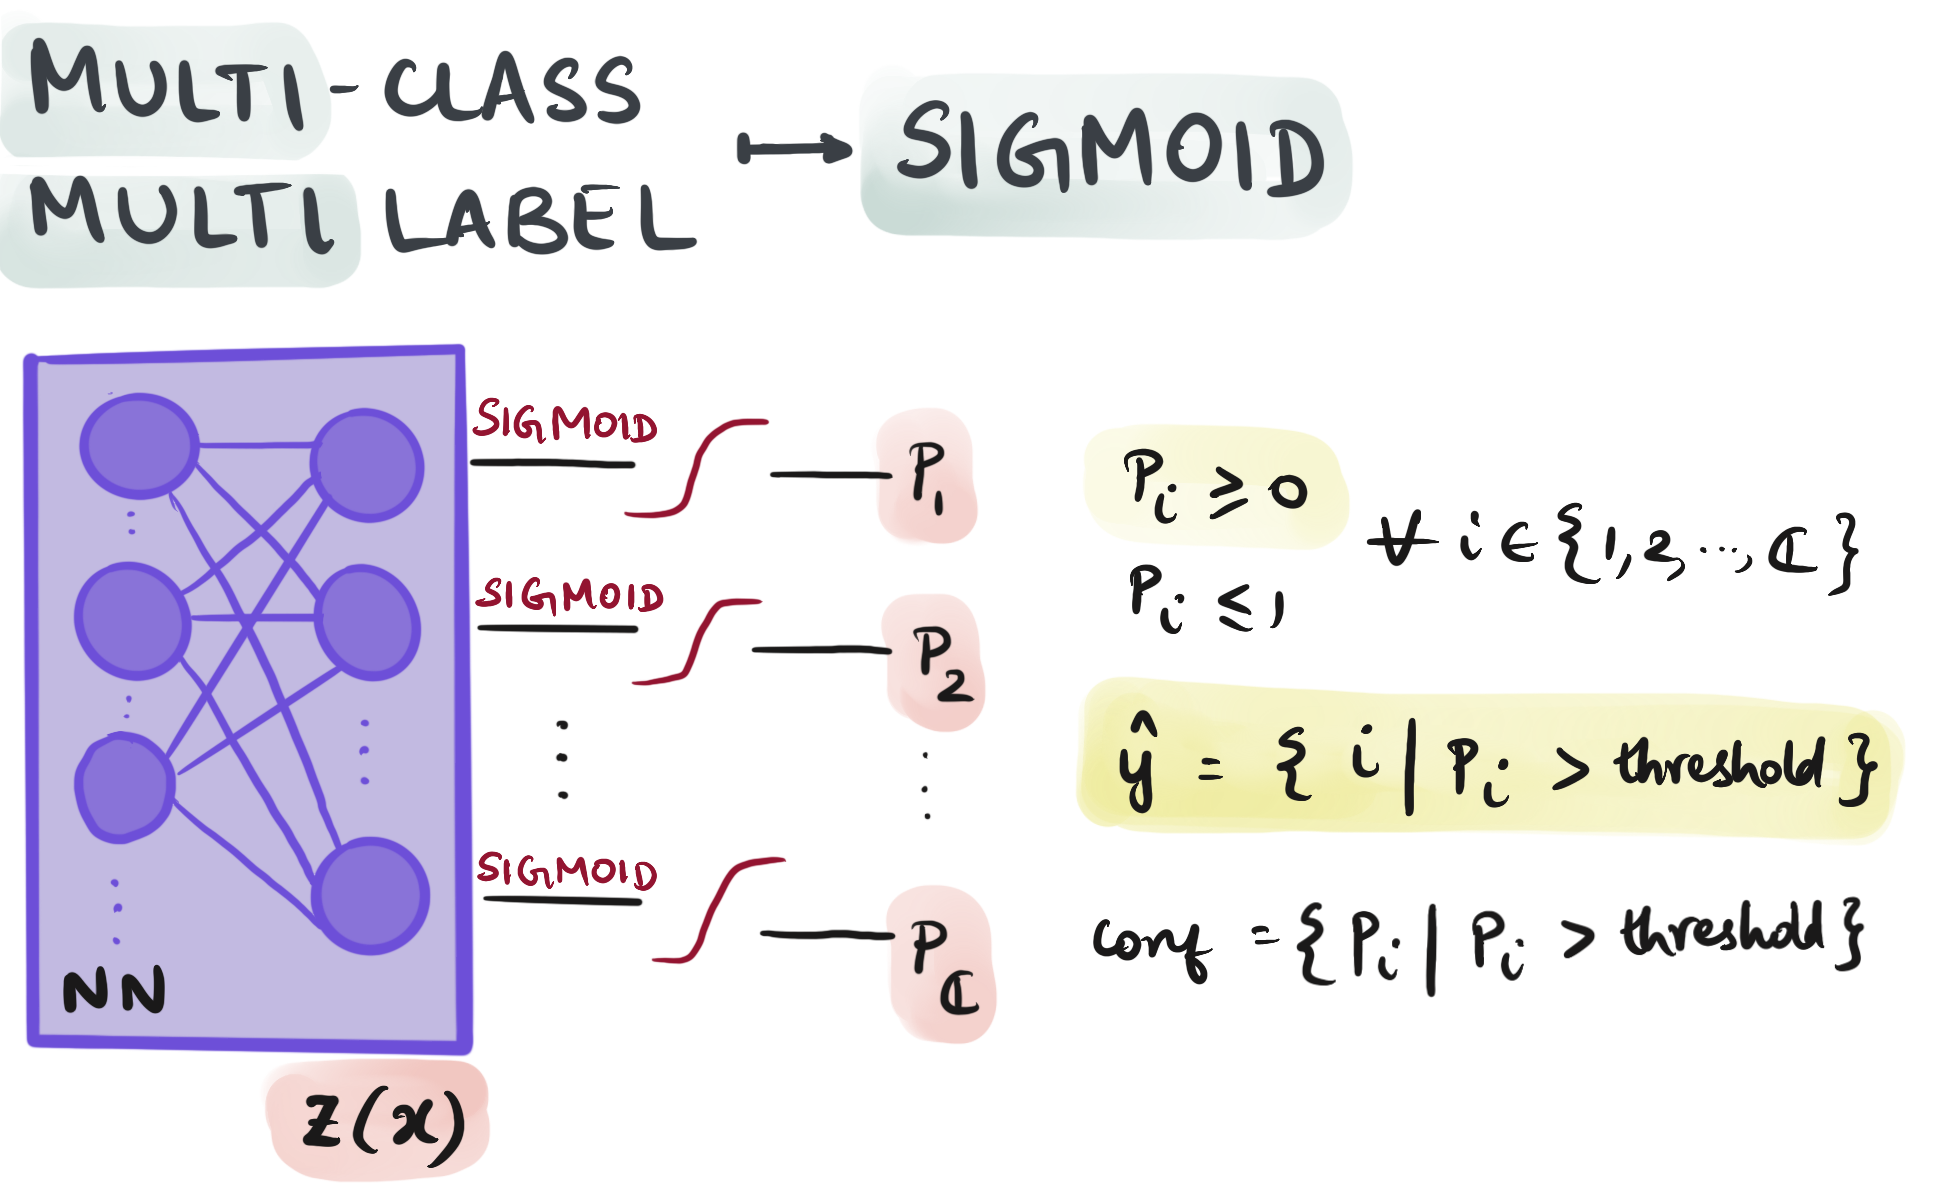

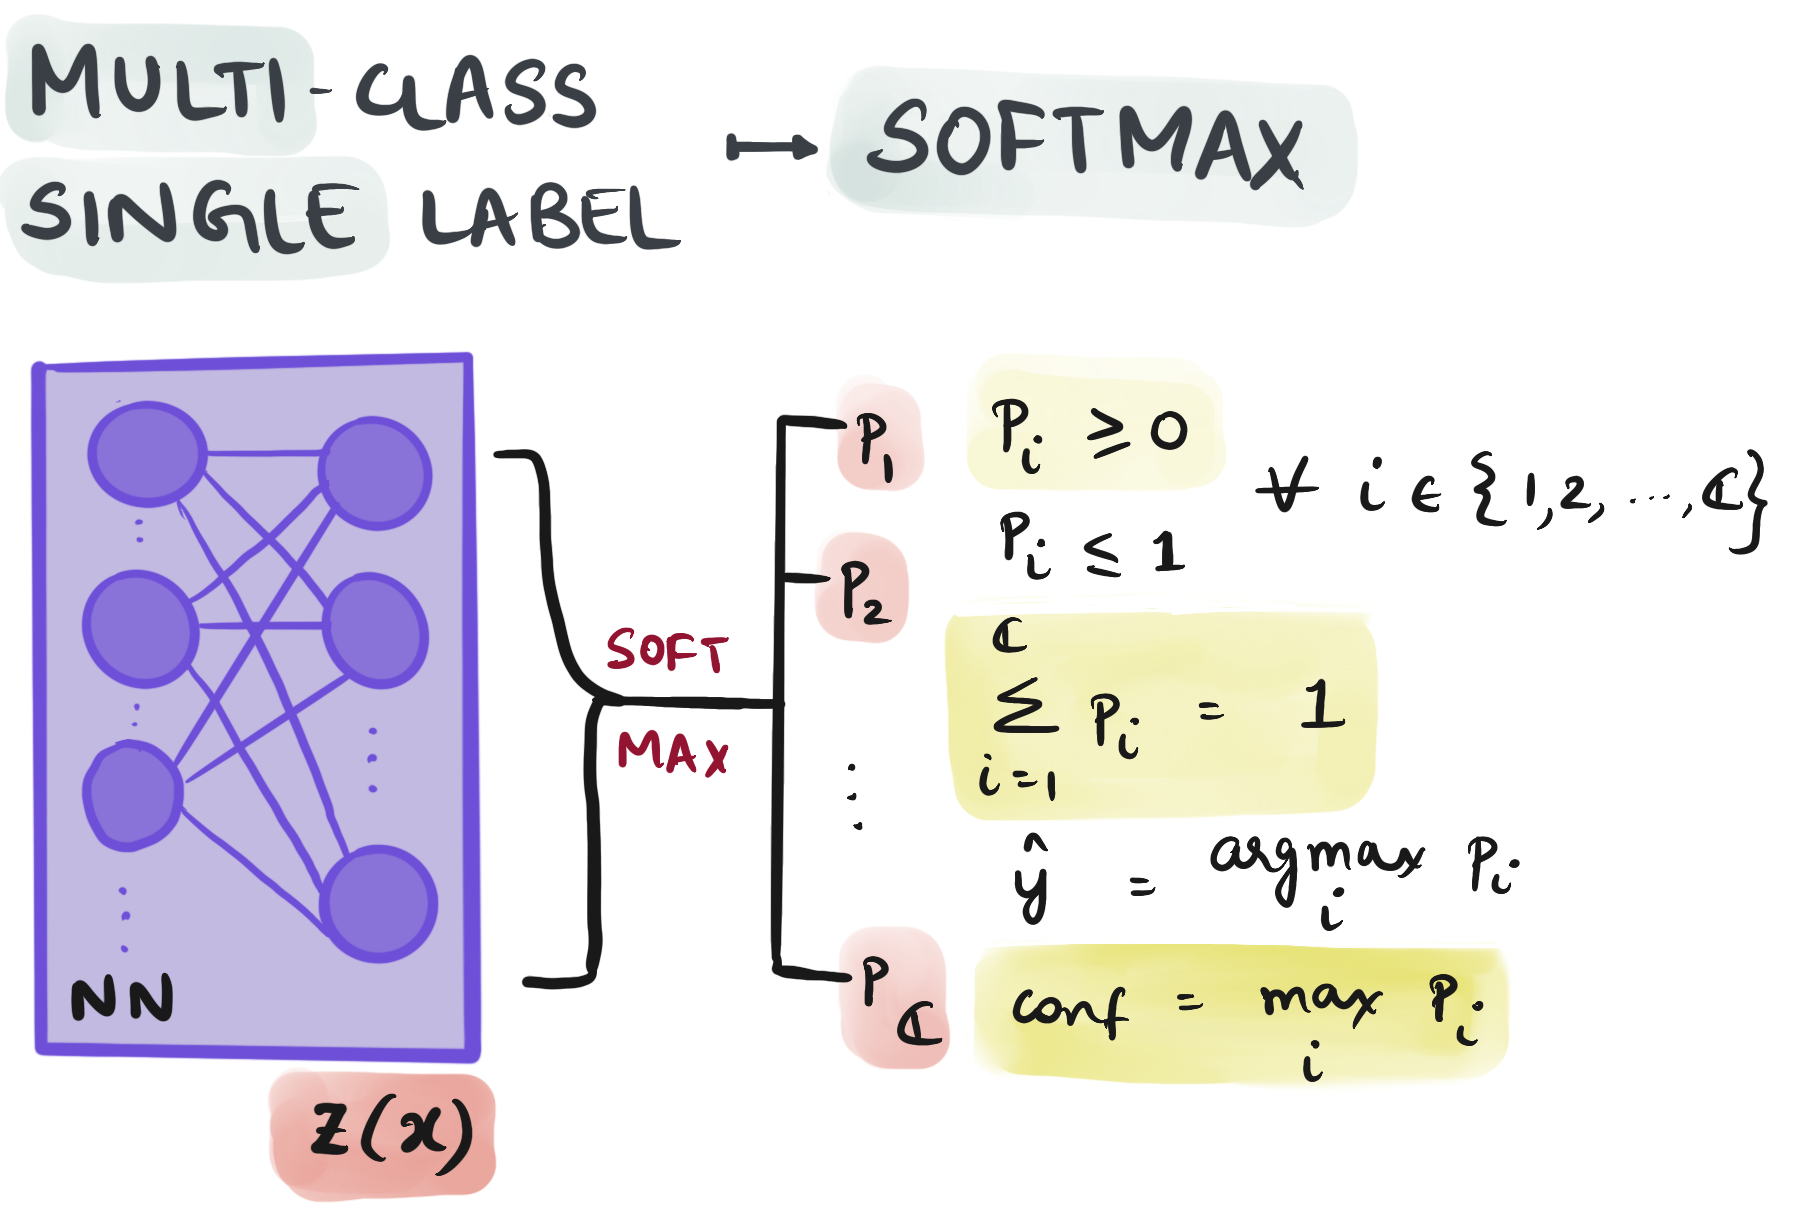

Source: https://web.stanford.edu/~nanbhas/blog/sigmoid-softmax/

##The RELU Activation Function

We discussed that sigmoids can be used in the hidden layers. However, as the capability of hardware increased through GPUs’, it was seen that very deep neural networks using sigmoid activation functions could not easily be trained, due to a problem called the "vanishing gradient problem".

The Rectified Linear (RELU) activation function overcomes this problem, allowing models to learn faster and perform better.

A ReLU activation function is linear in the positive dimension, but zero in the negative dimension. See what a [RELU looks like](https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png).


## Question 2

In the code block below, implement the ReLU activation function.

Bonus question: Read about other [variants of RELUs](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) and implement them.

### Answer 2

In [ ]:
""" Uncomment and enter your code for Question 2b here """
#Hints: look at the shape of the RELU presented above
# and refer to codeblocks above where we coded up sigmoid and softmax
#def ReLU(x,derivative = False):



# Forward Pass

When we compute through the four layers of our neural network --- composed of one input layer, two hidden layers (with Sigmoid activation function) and one output layer (with Softmax activation function) ---  to get the output $A3$ from the input features $A0$, this process is called "forward propogation" or **forward pass**.

Each step of the forward pass is as follows:

*   Matrix multiply the inputs from the previous layer with weights relating the input layer and hidden layer. For example: `prod = matmul(inputs, weights)` (Dot product in NumPy accomplishes the same. See code block below)
*   Apply the predefined activation function to the product. For example: `sigmoid(prod)`

This continues until we obtain the outcome of the final prediction layer. In the model defined here, $A3$ is the probability distribution of our prediction.

The forward pass is used for 2 purposes:
 * Prediction
 * Generating loss for backpropogation (more on this later lessons.)

Read through code for forward pass detailed below.

In [ ]:
def forward_pass(x_train):
    # input layer activations becomes sample
    params['A0'] = x_train

    # input layer to hidden layer 1
    params['Z1'] = np.dot(params['W1'], params['A0'])
    params['A1'] = sigmoid(params['Z1'])

    # hidden layer 1 to hidden layer 2
    params['Z2'] = np.dot(params["W2"], params['A1'])
    params['A2'] = sigmoid(params['Z2'])

    # hidden layer 2 to output layer
    params['Z3'] = np.dot(params["W3"], params['A2'])
    params['A3'] = softmax(params['Z3'])

    # this is the probability distribution
    return params['A3']

In [ ]:
''' If you want to try making changes to original code,
do it in this cell '''

def forward_pass(x_train):
    # input layer activations becomes sample
    params['A0'] = x_train

    # input layer to hidden layer 1
    params['Z1'] = np.dot(params["W1"], params['A0'])
    params['A1'] = sigmoid(params['Z1'])

    # hidden layer 1 to hidden layer 2
    params['Z2'] = np.dot(params["W2"], params['A1'])
    params['A2'] = sigmoid(params['Z2'])

    # hidden layer 2 to output layer
    params['Z3'] = np.dot(params["W3"], params['A2'])
    params['A3'] = softmax(params['Z3'])

    return params['A3'].T

# Backward Pass
As we have seen in previous lessons, in TensorFlow, we can use the `tf.keras.model.fit` function to train a neural network.

This single call encompasses two main steps:
*   a forward pass to get the predictions based on the current weights of the neurons at various layers.
*  and, **a backward pass, which uses the backpropogation algorithm a(or backprop for short) and an optimizer** (like SGD; more than that soon) to update the weights of the neural net based on how wrong or right the predictions from the forward pass were compared to known true classes of the input.

The backward pass is where weights are updated and model gets "trained" over time.

During the backward pass, the weights of the neural network are updated backwards. First, the error at $W3$ is calculated based on the loss (the difference between truth and prediction); then the error at $W2$ is calculated based on $W3$; and finally the error at $W1$ is calculated according to $W2$.

The specific logic in backprop for making these backward updates involves using differentiation to compute the error gradients for the weights (aka how much and in which direction will the change be for each weight parameter).

The code block below and the comments at each step clearly outline the steps of how the differentiating logic is used for calculating gradients for the weights in a neural network graph structure.


In [ ]:
# We create a dictionary of 2-d matrices called change_w
# Each change_w matrix represents how much the weights between two layers must change by.
# They are initialized randomly.
# They will be updated in Backward Pass function below
change_w= {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
            }

In [ ]:
def backward_pass(y_train, output):
    '''
        This is the backpropagation algorithm, for calculating the updates
        of the neural network's parameters.

        Note: There may be a stability issue that will generate warnings. This is
              caused  by the dot and multiply operations on the huge arrays.

              RuntimeWarning: invalid value encountered in true_divide
              RuntimeWarning: overflow encountered in exp
              RuntimeWarning: overflow encountered in square
    '''
    change_w = {}
    # Calculate W3 update
    # The error is calculated from W3 as a derivative of the loss, which is (output - y_train)^2
    # The loss function used is the Mean Squared Error and as the output has the softmax function in its calculation
    # Its derivative has the derivative of the softmax function
    error = 2 * (output - y_train) / output.shape[0] * softmax(params['Z3'], derivative=True)
    change_w['W3'] = np.outer(error, params['A2'])
    # Calculate W2 update
    # W2 uses W3 error and W3 weights to calculate error for the second hidden layer
    # Here the second hidden layer uses the sigmoid function to calculate its output
    # That is why we multiply the output by the derivative of the sigmoid function\
    error = np.dot(params['W3'].T, error) * sigmoid(params['Z2'], derivative=True)
    change_w['W2'] = np.outer(error, params['A1'])

    # Calculate W1 update
    # W1 uses W2 error and W2 weights to calculate error fpr second hidden layer
    # Here the second hidden layer uses the sigmoid function to calculate its output
    # That is why we multiply the output by the derivative of the sigmoid function
    error = np.dot(params['W2'].T, error) * sigmoid(params['Z1'], derivative=True)
    change_w['W1'] = np.outer(error, params['A0'])

    return change_w

#Stochastic Gradient Descent(SGD)

Speaking more broadly, backprop is a method of computing gradients for directed graphs in linear time in relation to graph size.

In the context of neural networks, backprop is paired with an optimizing algorithm to make the weight updates efficiently. One of the most common of such optimizers is Stochastic Gradient Descent (SGD). (One can use other optimization techniques with backprop as well. Symmetrically, one could also apply SGD to gradients obtained in a different way such as from sampling, numerical approximators etc.)

SGD's update rule is implemented in the  `update_network_parameters()` function defined below. It just needs the gradients for the weights as input.

To net out:
* Backprop and SGD are two different algorithms.
* Backprop is a clever differentiation algorithm for computing the gradients for the weights.
* SGD makes optimal updates to the neural network weights based on the gradients computed by backprop.
*  They are often used together to to train neural network models.


A variant of SGD is simple Gradient Descent (GD). In GD, we update all weights once on the whole dataset. And in SGD, we update the weights for each batch individually.


Bonus reading: Dig deeper into [the difference between SGD and Backprop](https://machinelearningmastery.com/difference-between-backpropagation-and-stochastic-gradient-descent/).

In [ ]:
def update_network_parameters(changes_to_w):
    '''
        Update network parameters according to update rule from
        Stochastic Gradient Descent.

        θ = θ - η * ∇J(x, y), where
            theta θ:            a network parameter (e.g. a weight w)
            eta η:              the learning rate
            gradient ∇J(x, y):  the gradient of the objective function,
                                i.e. the change for a specific theta θ
    '''

    for key, value in changes_to_w.items():
        params[key] -= l_rate * value

#Predict and Compute Accuracy

After updating the parameters of the neural network, we can measure the accuracy of the model trained with those parameters on a validation set that we conveniently pre-prepared. In this step, we validate how well our network performs after each iteration over the validation dataset.

The code below uses some of the same pieces as the training function: To begin with, it does a forward pass; then it finds the prediction of the network; and computes accuracy by comparing the prediction of each sample in the validation set against the true label of that sample. Finally, the average of the accuracy of the accuracy is computed and returned.

In [ ]:
def compute_accuracy(x_val, y_val):
    '''
        This function does a forward pass of x, then checks if the indices
        of the maximum value in the output equals the indices in the label
        y. Then it sums over each prediction and calculates the accuracy.
    '''
    predictions = []

    for x, y in zip(x_val, y_val):
    #for every input x in x_val,
        #forward pass; review the code in code blocks above;
        output = forward_pass(x)
        #compute the predicted value
        pred = np.argmax(output)
        #compare the prediction to true value y using equality
        #the comparison will be a 1 (for equal) or 0 (for unequal)
        #and store the outcome in a list
        predictions.append(pred == np.argmax(y))

    #return average (computed as mean) accuracy
    return np.mean(predictions)

# Training Loop

We have defined a forward and backward pass, but how can we start using them? We have to make a training loop and choose to use Stochastic Gradient Descent (SGD) as the optimizer to update the parameters of the neural network.

There are two main loops in the training function. One loop for the number of epochs, which is the number of times we run through the whole dataset, and a second loop for running through each observation one by one.

For each observation, we do a forward pass with $x$, which is one image in an array with the length 784, as explained earlier. The output of the forward pass is used along with $y$, which are the "one-hot encoded" labels (the ground truth), in the backward pass. After the backward pass, we get a dictionary of updates to the weights in the neural network.

In [ ]:
def train(x_train, y_train, x_val, y_val):
    #print(type(x_train), type(y_train), type(x_val), type(y_val))
    #print((x_train).shape, (y_train).shape, (x_val).shape, (y_val).shape)
    start_time = time.time()
    for iteration in range(epochs):
        for x, y in zip(x_train, y_train):
            #print(x, y)
            output = forward_pass(x)
            changes_to_w = backward_pass(y, output)
            update_network_parameters(changes_to_w)

        accuracy = compute_accuracy(x_val, y_val)
        print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
            iteration+1, time.time() - start_time, accuracy * 100
        ))

## Question 3
In which function(s), do we have to make changes in the code in order to change the dimensionality of the layers and change the number of layers?

Hint: go up and look at the code for the forward and backward pass.


### Answer 3

\<*Type your answer here*\>

# Function Call

Now, we can train this model. Finally! Give it a whirl!

**Note**: Since we have manually coded the entire forward pass, loss calculation, and backpropagation; the training will be slow, and you might not be able to immediately see the progress. Please give it 1 minute per epoch.

In [ ]:
train(x_train.to_numpy(), y_train, x_val.to_numpy(), y_val)

#Fun Fact
An American Psychologist, Frank Rosenblatt, created the first physical neural network using a potentiometer, named a perceptron or mark-1 perceptron. He was trying to solve a visual recognition task and it created a lot of hype in the public. But people realized its limitations when it failed to solve the XOR problem.

#Equivalent TensorFlow Model
Coding up a model from scratch, as we have done in today's lession, gives us a lot more control on how the training happens. However, while it may be easier to understand and control the different aspects of the model in this way, building a model from scratch is not needed to have control over commonly varied aspects of a neural network. We can use the Tensorflow library to build the model and still able to modify those aspects of a model, if we need to.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

Here we prepare the dataset quite similarly in sense of what operations we do to it.

In [ ]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train)

x_val = x_val.astype('float32') / 255
y_val = to_categorical(y_val)

We initialize the model by specifying the hyperparameters. It is simpler and changing hyperparameters is easier as well.

In [ ]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

You will notice how training is faster per epoch as much of the training code is written in C making it execute faster.

In [ ]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# Upload this Colab Notebook to your Github repository. Also add your *reflections* on today's learning in README.md

# Bonus

## Bonus Question 1

Why do we subtract values ($\eta * \nabla J(x, y)$) from the weights $\theta$ rather than add?


### Answer to bonus question:

\<*Type your answer here*\>